# Thoracic Surgery for Lung Cancer
---

<img style="float: left; margin-left: 10px; margin-right: 30px; height: 200px" src="img/lung_cancer_surgery.jpg">

<p>Lung cancer is the leading cause of cancer-related deaths in the world. In the United States, lung cancer claims more lives every year than colon cancer, prostate cancer, and breast cancer combined.</p>

<p>The American Cancer Society’s estimates for lung cancer in the United States for 2018 are:
<ul>
<li>About 234,030 new cases of lung cancer (121,680 in men and 112,350 in women)
<li>About 154,050 deaths from lung cancer (83,550 in men and 70,500 in women) 
</ul>
</p>

<p>Despite the very serious prognosis (outlook) of lung cancer, some people with earlier stage cancers are cured. More than 430,000 people alive today have been diagnosed with lung cancer at some point.</p>


### Abstract
---

<p>The data is dedicated to classification problem related to the post-operative life expectancy in the lung cancer patients: class 1 - death within one year after surgery, class 2 - survival.</p>



### Data Set Information
---

<img style="float: left; margin-left: 10px; margin-right: 30px; height: 120px" src="img/med_univ_wroclaw.jpg">

<p>The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007-2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.</p>

|   Attribute  |  Description  |
|:--------------|:--------------|
|   **Diagnosis**  | ICD-10 codes for primary and secondary as well multiple tumors if any |
|   **FVC**  | Amount of air which can be forcibly exhaled from the lungs after taking the deepest breath possible |
|   **FEV1**  | Volume that has been exhaled at the end of the first second of forced expiration |
|   **Performance**  | Performance status on Zubrod scale, Good (0) to Poor (2) |
|   **Pain**  | Pain before surgery (T = 1, F = 0)  |
|   **Haemoptysis**  | Coughing up blood, before surgery (T = 1, F = 0) |
|   **Dyspnoea**  | Difficulty or labored breathing, before surgery (T = 1, F = 0)  |
|   **Cough**  | Symptoms of Coughing, before surgery (T = 1, F = 0)   |
|   **Weakness**  | Weakness, before surgery (T = 1, F = 0)  |
|   **Tumor_Size**  |  T in clinical TNM - size of the original tumor, 1 (smallest) to 4 (largest) |
|   **Diabetes_Mellitus**  | Type 2 diabetes mellitus (T = 1, F = 0)   |
|   **MI_6mo**  | Myocardial infarction (Heart Attack), up to 6 months prior(T = 1, F = 0)   |
|   **PAD**  | Peripheral arterial diseases (T = 1, F = 0)   |
|   **Smoking**  | Patient smoked (T = 1, F = 0)   |
|   **Asthma**  | Patient has asthma (T = 1, F = 0)   |
|   **Age**  | Age at surgery   |
|   **Death_1yr**  | 1 year survival period - (T) value if died (T = 1, F = 0)    |


In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [7]:
df = pd.read_csv('data/ThoracicSurgery.csv')

In [8]:
df.tail()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
449,2,3.88,2.12,1,0,0,0,1,0,3,0,0,0,1,0,63,0
450,3,3.76,3.12,0,0,0,0,0,0,1,0,0,0,1,0,61,0
451,3,3.04,2.08,1,0,0,0,1,0,3,0,0,0,0,0,52,0
452,3,1.96,1.68,1,0,0,0,1,1,2,0,0,0,1,0,79,0
453,3,4.72,3.56,0,0,0,0,0,0,2,0,0,0,1,0,51,0


In [9]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [10]:
# Stats for live and death after 1 yr patients
live = df[df['Death_1yr'] == 0]
death = df[df['Death_1yr'] == 1]

cond = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
        'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]

ld = pd.DataFrame(data={'Attribute': cond, 'Live 1yr Mean': l, 'Death 1yr Mean': d})
ld = ld.set_index('Attribute')

print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(df.Death_1yr)*100))
ld

Death: 69, Live: 385
1 year death: 15.20% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,3.304597,3.195072
FEV1,2.540805,2.383188
Performance,0.774026,0.913043
Pain,0.051948,0.101449
Haemoptysis,0.124675,0.202899
Dyspnoea,0.044156,0.115942
Cough,0.677922,0.797101
Weakness,0.158442,0.246377
Tumor_Size,1.683117,2.014493


### How many patients died in 1 year?

---

<img style="float: left; margin-left: 10px; margin-right: 30px; height: 120px" src="img/lung_cancer.jpg">

Out of the 454 patients, 69 did not survive 1 year after their operations, which is 15.20% of the total sample size.

Looking at the means of the two different patient classes, there are features with significant differences and those with minor. However, just looking at the numbers without scaling them appropriately to each other makes comparison difficult. So, let's do an approximate normalization of each value for convenient comparison.


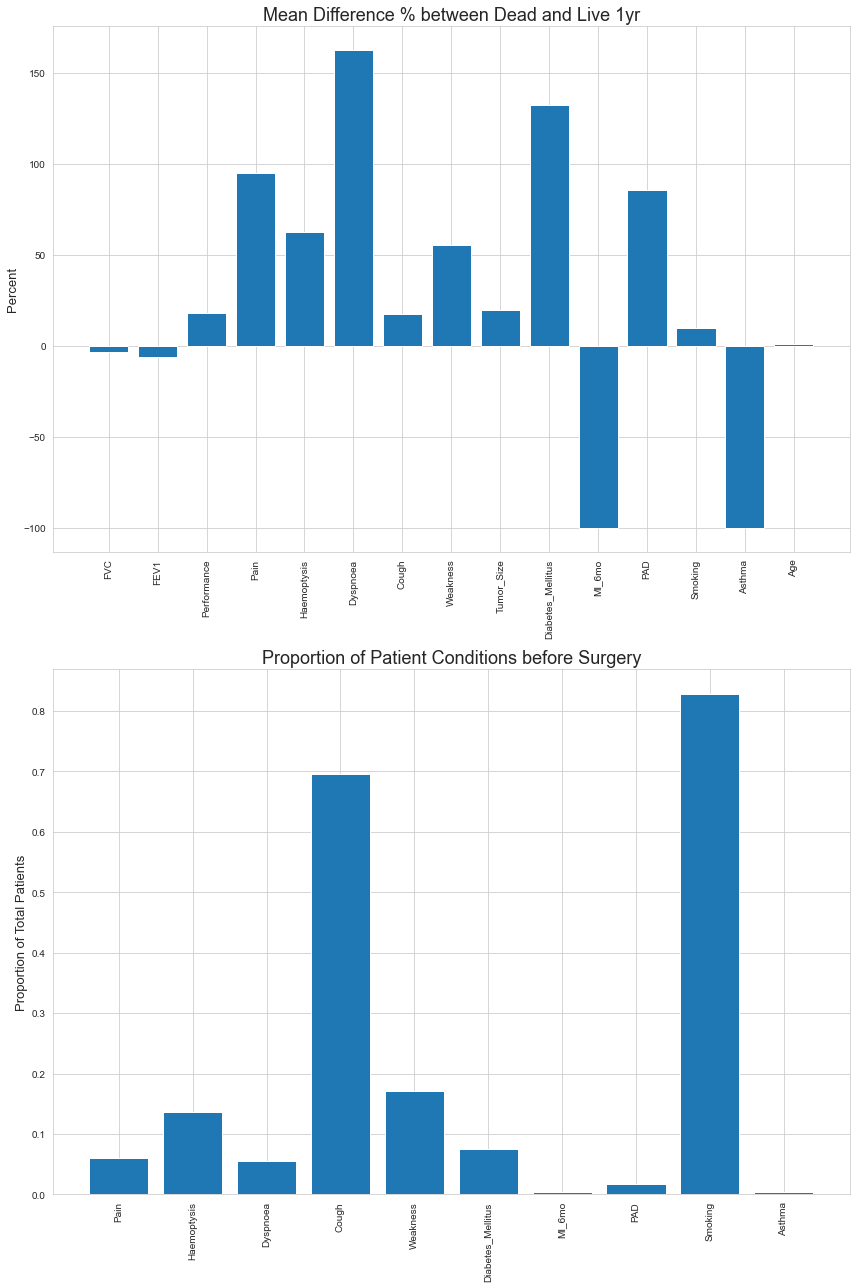

In [12]:
# Percentage difference in means of live vs death patients
d = np.array(d)
l = np.array(l)

p_diff = (d-l)/l*100

fig, axes = plt.subplots(2,1,figsize=(12,18))

axes[0].bar(cond, p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)

# Count plot of true/false condition columns

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma']
tf_sum = [df[col].sum()/454 for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize=18)

plt.tight_layout()

plt.show()

### What are the differences for the 1 year death patients?
---

<img style="float: right; margin-left: 10px; margin-right: 30px; height: 110px" src="img/steth.png">

Looking at the graph, one can see easily compare the attributes to determine features of significance.
The most notable attributes for those who died are *Dyspnoea*, *Diabetes Mellitus*, *Pain*, *PAD*, and *Haemoptysis* (in decreasing order), indicating that for those who died, these features were strongly presented. *Asthma* and *MI of 6 months* have negative 100% values, and looking at the numerical values reveals that those who died did not exhibit asthma or MI. Although the mean differences are useful, further investigation of the number of instances of each attributes in combination with the mean differences will improve our decision on what features to focus on.

The overall count should be considered when comparing mean differences, because the lower count numbers will have larger fluctuations to small differences. The count of *Cough* and *Smoking* are most noteworthy indicating these conditions are strongly correlated to those patients who are to receive thoracic surgery for lung cancer, but the mean differences are a small positive value indicating more representation in the dead patients. Looking at the count graph for noteworthy features from the mean differences graph, most of the values are low in count. To best assess if these attributes' mean differences are of significance, a hypothesis test of whether the mean difference is significant will help narrow down the features of interest.

### Categorical Data (Diagnosis, Tumor_Size, Performance)
---

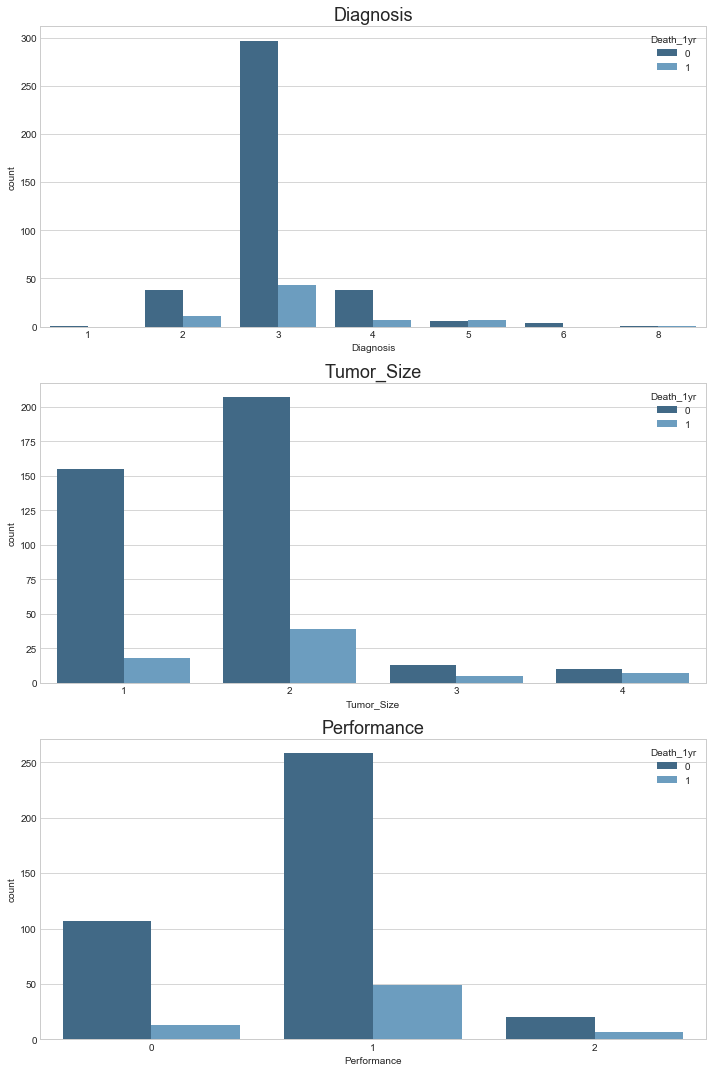

In [7]:
# Count plots of Diagnosis, Tumor_Size, Performance with difference of live and death data

fig, axes = plt.subplots(3,1,figsize=(10,15))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[0]).set_title('Diagnosis', fontsize=18)
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[1]).set_title('Tumor_Size', fontsize=18)
sns.countplot(x='Performance', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[2]).set_title('Performance', fontsize=18)

plt.tight_layout()

#### Analysis of live and death patients for Diagnosis, Tumor_Size, and Performance

<img style="float: left; margin-left: 0px; margin-right: 15px; height: 150px" src="img/diag.jpg">

For Diagnosis, the large majority of patients are in category 3. The other categories are relatively small while category 4, 2, and 5 should be considered for their counts in that order. The proportion of live to dead at a glance seems to be similar for the diagnosis categories except for 5, where the death count is higher than the live count, which indicates this diagnosis is more fatal than the others even with surgery.

For Tumor Size, categories 1 and 2 are the majority. At a glance, the proportion of the dead to live generally increases with the tumor size ranging from 1 to 4, indicating the higher tumor size correlates to higher chance of death even with surgery. Category 4 tumor size is most even in its split between death and live patient data. Also looking at the dead to live mean difference graph, the dead had higher means indicating larger tumor sizes overall.

For Performance, categories are 1, 0, 2 in decreasing order of count. Performance 0 category reveals low death count and good proportion to live data, which makes sense since on the Zubrod scale 0 is good and 2 is poor. Category 1 and 2 display similar proportion to live and dead patients, but with category 1 having a majority of the count. Referring to the dead to live mean difference graph, the dead had higher means indicating the dead on average had poorer performance with a higher Zubrod score than the live.

### Hypothesis Test of Mean Differences between Live and Death Patients

---

All the observations above highlighted the trends and patterns in the attributes. However, to ascertain their significance, a hypothesis test will be useful to see if these patterns and trends are not just by chance.

> * **Null Hypothesis:** The 1 year live and death patients have the same distribution and mean. (Tested for each attribute.)
  * **Test Statistic:** Mean difference between death and live patients.
  * **Significance Level:** 0.05

In [13]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [14]:
# Hypothesis testing with Permutations of data
condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
             'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
p_val = []

for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(death[c], live[c], diff_of_means, size=10000)
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)

print(list(zip(condition, p_val)))

[('FVC', 0.1652), ('FEV1', 0.0567), ('Performance', 0.0304), ('Pain', 0.094), ('Haemoptysis', 0.0618), ('Dyspnoea', 0.022), ('Cough', 0.0271), ('Weakness', 0.0572), ('Tumor_Size', 0.0002), ('Diabetes_Mellitus', 0.0211), ('MI_6mo', 0.7139), ('PAD', 0.3438), ('Smoking', 0.0619), ('Asthma', 0.7165), ('Age', 0.2818)]


#### Results for Hypothesis Test

>With significance level of **0.05**,
 * **Cannot Reject Null Hypothesis:** FVC, FEV1, Pain, Haemoptysis, Weakness, MI_6mo, PAD, Smoking, Asthma, Age
 * **Reject Null Hypothesis:** Performance, Dyspnoea, Cough, Tumor_Size, Diabetes_Mellitus

The null hypothesis stated that the means of life and death patients were the same for the attributes tested. With the results above, the attributes of significance are those that rejected the null hypothesis. To highlight the trends for those that rejected the null hypothesis, the mean difference percentages are listed below.

**Mean difference % for death in 1 year patients for attributes of significance:**
* Performance = 17.96% 
* Dyspnoea = 162.57% 
* Cough = 17.58%
* Tumor_Size = 19.69%
* Diabetes_Mellitus = 132.49%

### Numerical Data (Age, FVC, FEV1)
---

The mean difference graph reveals little difference in Age while there is a small negative difference for the dead compared to the live. So this indicates the dead patients on average performed worse for lung capacity compared to the live patients.

The plots below will further investigate the relationship between these three numerical data columns.

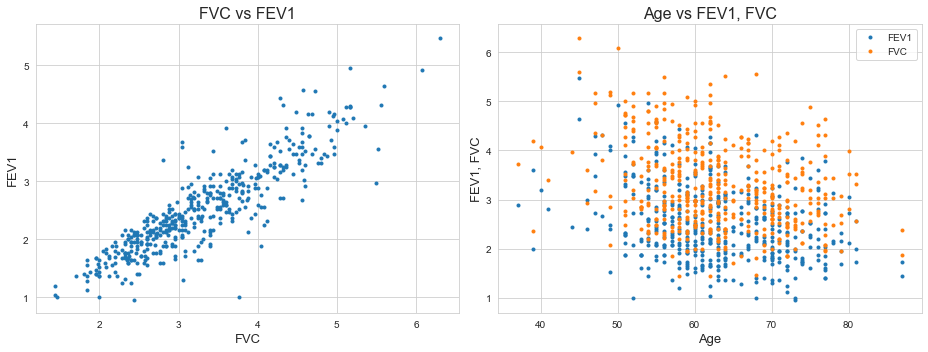

In [15]:
# Scatter plot for FVC, FEV1, Age columns

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(df.FVC, df.FEV1, linestyle='none', marker='.')

axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

axes[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')
axes[1].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1, FVC', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs FEV1, FVC', fontsize=16)

plt.tight_layout()

In [16]:
# Correlation coefficients for FVC and FEV1
np.corrcoef(df.FVC, df.FEV1)[0,1]

0.8875452733829

In [17]:
# Correlation coefficients for Age and FVC
np.corrcoef(df.Age, df.FVC)[0,1]

-0.299429919660491

In [18]:
# Correlation coefficients for Age and FEV1
np.corrcoef(df.Age, df.FEV1)[0,1]

-0.30961662730798906

#### Correlations of FVC, FEV1, and Age

<img style="float: left; margin-left: 0px; margin-right: 0px; height: 110px" src="img/fvc.png">

From looking at the graphs, one can see a strong positive correlation between FVC and FEV1, while Age has a slight negative trend in the graphs. The correlation coefficient calculated for FVC and FEV1 is *0.89*, which is very strong on top of the fact that the data points are grouped together to show a visible linear trend. On the other hand, Age's correlation with FVC and FEV1 are about *-0.3* for both, but the data points are more spread out. The mild negative trend for age against the other two features makes intuitive sense as it would be expected that as you get older, your lung capacity decreases.

In [19]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""    
    n = len(data)    
    x = np.sort(data)    
    y = np.arange(1, n+1) / n    
    return x, y

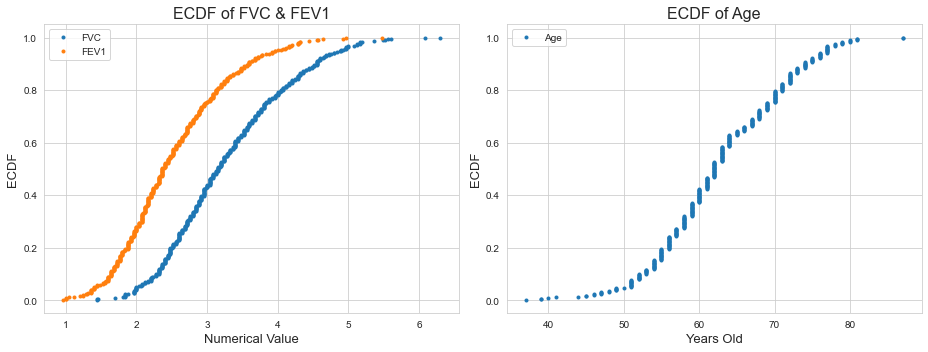

In [20]:
# ECDF of FVC, FEV1, Age
x_fvc, y_fvc = ecdf(df.FVC)
x_fev1, y_fev1 = ecdf(df.FEV1)
x_age, y_age = ecdf(df.Age)

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(x_fvc, y_fvc, marker='.', linestyle='none', label='FVC')
axes[0].plot(x_fev1, y_fev1, marker='.', linestyle='none', label='FEV1')

axes[0].set_xlabel('Numerical Value', fontsize=13)
axes[0].set_ylabel('ECDF', fontsize=13)
axes[0].legend(loc='upper left')
axes[0].set_title('ECDF of FVC & FEV1', fontsize=16)

axes[1].plot(x_age, y_age, marker='.', linestyle='none', label='Age')
axes[1].set_xlabel('Years Old', fontsize=13)
axes[1].set_ylabel('ECDF', fontsize=13)
axes[1].legend(loc='upper left')
axes[1].set_title('ECDF of Age', fontsize=16)

plt.tight_layout()

#### Distribution of Numerical Data

All numerical data display fairly normal distributions. FVC and FEV1 are comparable in their distribution with different means; FEV with its mean at 2.52 and FVC at 3.29. Age mean is at 63.

### Summary of EDA
---

* Out of the 454 patients, 69 died and 385 lived the 1 year period after surgery. So, 15.20% of patients died.

* Several features presented strongly for those who died: Dyspnoea, Diabetes Mellitus, Pain, PAD, and Haemoptysis (Top 5 in decreasing order).

* Overall, most patients who received surgery smoked (~80%) and presented with symptoms of coughing (~70%), while the rest of the attributes presented under 20% of the total patients.

* Majority of patients were categorized as diagnosis code 3. The proportion of live to dead is similar for the diagnosis codes. For tumor size, most of the patients are in category 1 and 2, and the data presents a trend of more proportion of dead as tumor size increases. For performance, the trend observed is more proportion of dead as performance zubrod score increases, which means patient performance decreases.

* Hypothesis testing reveals attributes of significance: Performance, Dyspnoea, Cough, Tumor_Size, Diabetes_Mellitus.

* As Age increases, the FEV1 and FVC decrease with correlations of -0.31 and -0.30, respectively. FEV1 and FVC are highly correlated with a value of 0.89.

### Predictive Modeling
---

<img style="float: left; margin-left: 0px; margin-right: 10px; height: 160px" src="img/ml.jpg">

So now that we have thoroughly explored the patterns and trends in the data set, the next step is to utilize machine learning models to see if how well we can predict the target variable, Death_1yr, with the feature variables.

Since the data set is imbalanced and mostly live patients (85%), just predicting all live patients will give a high accuracy score ~85%. So for the model, accuracy will not be a good score method and instead I will look at average precision score, which summarizes the precision-recall curve. Also for the imbalance, there are couple options including downsampling, upsampling, or adjusting class weights to balance the classes. Since downsampling will create a small data set to work with and upsampling may complicate the data further, I will focus on adjusting the class weights.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier
import itertools

In [22]:
# All attributes excluding target variable, Asthma, and MI_6mo
X = df.drop(['Death_1yr', 'MI_6mo', 'Asthma'], axis=1)

# Attributes of Significance from Hypothesis Testing
X2 = df[['Performance', 'Dyspnoea', 'Cough', 'Tumor_Size', 'Diabetes_Mellitus']]
y = df['Death_1yr']

In [35]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
def model_report(model, X, y, title, weight=None):
    """Takes in classifier model with X data and class weight to display scores and confusion matrix."""

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1111, stratify=y)
    
    clf = model(class_weight=weight, random_state=1111)
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    class_names = ['Live', 'Death']
    
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred, target_names=class_names))

    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
      
    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title=title)
    plt.show()

In [33]:
def class_weights_plot(model, title):
    """Plots accuracy, average precision, and correct death predictions of different class weights for X2 data."""
    class_weights = [1,2,3,4,5,6,7,8,9,10]
    acc_scores = []
    prec_scores = []
    correct_deaths = []

    for cw in class_weights:
        clf = model(class_weight={0: 1, 1: cw}, random_state=1111)
        predicted = cross_val_predict(clf, X2, y, cv=5)

        acc_scores.append(accuracy_score(y, predicted))
        prec_scores.append(average_precision_score(y, predicted))
        correct_deaths.append(confusion_matrix(y, predicted)[1,1]/68)
    
    plt.figure(figsize=(8,6))
    plt.plot(class_weights, acc_scores, marker='.', label='Accuracy Score')
    plt.plot(class_weights, prec_scores, marker='.', label='Average Precision')
    plt.plot(class_weights, correct_deaths, marker='.', label='Correct Death Predictions')
    plt.xticks(class_weights)
    plt.xlabel('Class Weights', fontsize=13)
    plt.ylabel('Scores', fontsize=13)
    plt.legend()
    plt.title(title, fontsize=16)

    plt.show()

In [26]:
def class_weights_tf_plot(model, title):
    """Plots confusion matrix values of different class weights for X2 data."""
    class_weights = [1,2,3,4,5,6,7,8,9,10]
    true_live = []
    false_live = []
    true_death = []
    false_death = []

    for cw in class_weights:
        clf = model(class_weight={0: 1, 1: cw}, random_state=1111)
        predicted = cross_val_predict(clf, X2, y, cv=5)
        
        true_live.append(confusion_matrix(y, predicted)[0,0]/385)
        false_live.append(confusion_matrix(y, predicted)[1,0]/68)
        true_death.append(confusion_matrix(y, predicted)[1,1]/68)
        false_death.append(confusion_matrix(y, predicted)[0,1]/385)
    
    plt.figure(figsize=(8,6))
    plt.plot(class_weights, true_live, marker='.', label='Correct Live Predictions')
    plt.plot(class_weights, false_live, marker='.', label='False Live Predictions')
    plt.plot(class_weights, true_death, marker='.', label='Correct Death Predictions')
    plt.plot(class_weights, false_death, marker='.', label='False Death Predictions')
    plt.xticks(class_weights)
    plt.xlabel('Class Weights', fontsize=13)
    plt.ylabel('Scores', fontsize=13)
    plt.legend()
    plt.title(title, fontsize=16)

    plt.show()

### Logistic Regression
---

Accuracy: 0.85
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.85      1.00      0.92       116
       Death       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

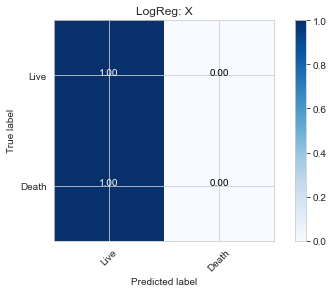

In [39]:
# Log Reg on X with no class weights
model_report(LogisticRegression, X, y,'LogReg: X')

Accuracy: 0.68
Average Precision: 0.20
              precision    recall  f1-score   support

        Live       0.89      0.71      0.79       116
       Death       0.24      0.52      0.33        21

    accuracy                           0.68       137
   macro avg       0.57      0.62      0.56       137
weighted avg       0.79      0.68      0.72       137

Normalized confusion matrix
[[0.71 0.29]
 [0.48 0.52]]


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\AppData\Local\Temp\ipykernel_14136\561746569.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


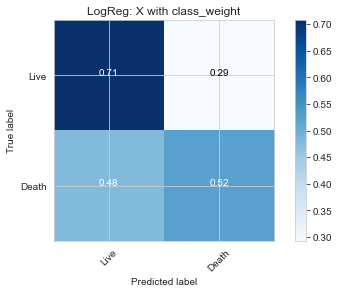

In [40]:
# Log Reg on X with class weight balanced since imbalanced death numbers (15%)
model_report(LogisticRegression, X, y,'LogReg: X with class_weight','balanced')

Accuracy: 0.85
Average Precision: 0.15
             precision    recall  f1-score   support

       Live       0.85      1.00      0.92       116
      Death       0.00      0.00      0.00        21

avg / total       0.72      0.85      0.78       137

Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


C:\Users\seung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


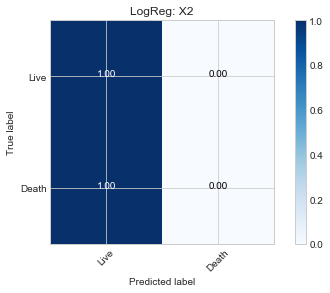

In [52]:
# X2 log reg with no class weights
model_report(LogisticRegression, X2, y,'LogReg: X2')

Accuracy: 0.58
Average Precision: 0.20
              precision    recall  f1-score   support

        Live       0.91      0.55      0.69       116
       Death       0.22      0.71      0.34        21

    accuracy                           0.58       137
   macro avg       0.57      0.63      0.51       137
weighted avg       0.81      0.58      0.63       137

Normalized confusion matrix
[[0.55 0.45]
 [0.29 0.71]]


C:\Users\gokul\AppData\Local\Temp\ipykernel_14136\561746569.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


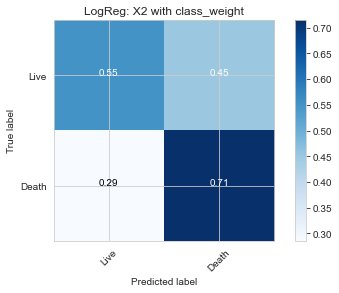

In [41]:
# X2 log reg with class weight balanced
model_report(LogisticRegression, X2, y,'LogReg: X2 with class_weight','balanced')

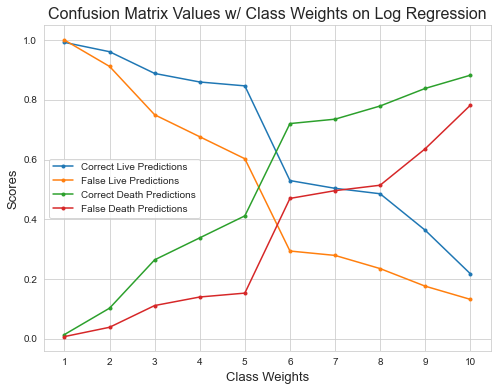

In [42]:
# Plot different class weights influence on Log Reg X2
class_weights_tf_plot(LogisticRegression, 'Confusion Matrix Values w/ Class Weights on Log Regression')

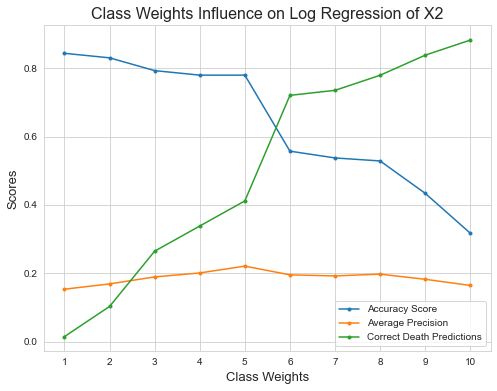

In [43]:
# Plot different class weights influence on LogReg X2
class_weights_plot(LogisticRegression, 'Class Weights Influence on Log Regression of X2')

#### Logistic Regression Conclusion
---

Since the data set is imbalanced with only 15% patient death, the results of the model without any class weight to offset this imbalance favors the live column in the confusion matrix. As you can see above, the model predicts mostly all live patients to maximize the accuracy score to 85%, the size of the live patient data, in both the X and X2 data sets.

With the class weight parameter, the death prediction rate increases at the cost of live patient prediction, and also the accuracy. In order to see the effectiveness of the model for my purpose, the confusion matrix or classification report can be used to assess the death predictions. Also, the average precision score is a good summary of the precision-recall curve, which is useful in this case.

The class weight argument is set to 'balanced' to equalize the death to live ratio, which is 15 to 85. This argument can be altered with any ratio value and the effects can be seen in the graphs above. Although the correct death predictions increased with more class weight on the deaths, the false death predictions increased as well with decrease in correct live predictions. The influence of class weights can be seen in the graph above. Interesting to note that the score dips dramatically around the 5.67 value, which is the equalizing point for the ratio 15 to 85.

---

### Random Forest Classifier
---

Accuracy: 0.83
Average Precision: 0.15
              precision    recall  f1-score   support

        Live       0.84      0.98      0.91       116
       Death       0.00      0.00      0.00        21

    accuracy                           0.83       137
   macro avg       0.42      0.49      0.45       137
weighted avg       0.72      0.83      0.77       137

Normalized confusion matrix
[[0.98 0.02]
 [1.   0.  ]]


C:\Users\gokul\AppData\Local\Temp\ipykernel_14136\561746569.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


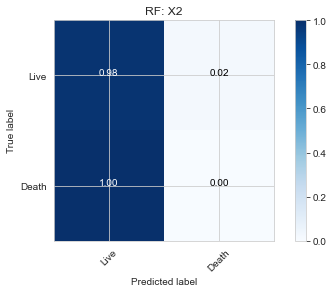

In [44]:
# X2 Random Forest Classifier with equal class weights 1:1
model_report(RandomForestClassifier, X2, y,'RF: X2')

Accuracy: 0.54
Average Precision: 0.14
             precision    recall  f1-score   support

       Live       0.82      0.59      0.68       116
      Death       0.11      0.29      0.16        21

avg / total       0.71      0.54      0.60       137

Normalized confusion matrix
[[ 0.59  0.41]
 [ 0.71  0.29]]


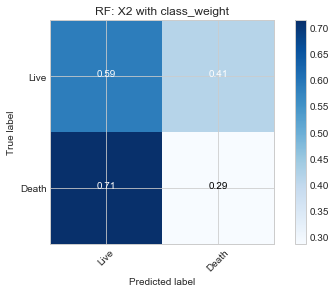

In [70]:
# X2 Random Forest Classifier with class weight 5.67
model_report(RandomForestClassifier, X2, y, 'RF: X2 with class_weight','balanced')

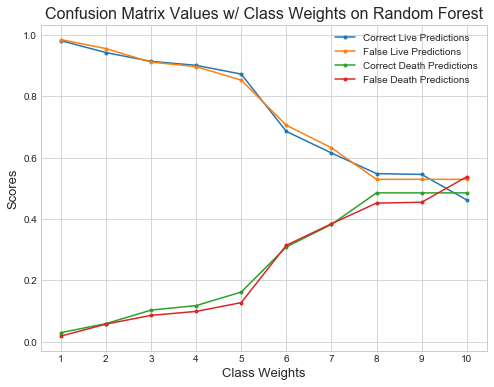

In [48]:
# Plot different class weights influence on RF classifier
class_weights_tf_plot(RandomForestClassifier, 'Confusion Matrix Values w/ Class Weights on Random Forest')

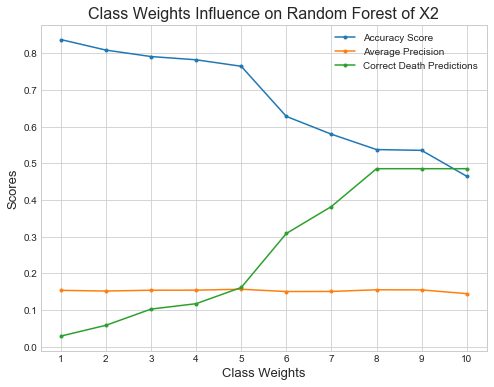

In [40]:
# Plot different class weights influence on RF classifier
class_weights_plot(RandomForestClassifier, 'Class Weights Influence on Random Forest of X2')

In [68]:
# Grid Search Hyperparameters for Random Forest
rfc = RandomForestClassifier(random_state=1111) 

param_grid = {
           "n_estimators" : [5, 6, 7, 8, 9],
           "max_depth" : [7, 8, 9, 10],
           "min_samples_leaf" : [7, 8, 9, 10],
           "class_weight": [None, 'balanced', {0: 1, 1: 5}]}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring='average_precision')
CV_rfc.fit(X2, y)
print(CV_rfc.best_params_)
print('Best average precision score: {:.4f}'.format(CV_rfc.best_score_))

{'class_weight': None, 'max_depth': 7, 'min_samples_leaf': 8, 'n_estimators': 5}
Best average precision score: 0.2609


#### Conclusion of Random Forest Classifier
---

Similar to the Logistic Regression models, the Random Forest predicts deaths better with a class weight parameter to balance the data. The plot reveals the cost of correct live predictions and benefit of correct death predictions with differing class weights. It is interesting to note the different pattern this model takes compared to the log regression graphs above. Based solely on average precision, the log regression produces better results.

However, with hyperparameter tuning, the random forest classifier above delivers higher average precision scores compared to what the log regression model did in any class weight value. It is interesting to note that the GridSearchCV above notes the best parameter as having no class weight argument. So, there probably are combinations of hyperparameters that perform better than the models highlighted above with class weights. For future optimization, more hyperparameter tuning can be done with a more in-depth parameter grid or utilizing RandomSearch if needed.

### Proceeding Forward...
---

<img style="float: left; margin-left: 0px; margin-right: 10px; height: 110px" src="img/next.jpg">

Although this report explored several options, there are many more going beyond this report.

First, more data will improve the scope of the data analysis and models. From analysis of this data set, it is clear that there are significant overlaps of attributes, so more patient data or perhaps creating a new data set with additional attributes could help better distinguish the differences and improve the model. If not new data recordings, there are probably similar data sets that have models that predict lung cancer deaths that could be of use in optimizing this model by using it in combination.

Another option is to optimize the models above with hyperparameter tuning. However, since the accuracy score is unreliable in determining positive death predictions, you would have to determine what score to maximize and minimize before proceeding forward in hyperparameter tuning. This scoring method could be the one used in this report, average precision score, or could be a custom scoring method created using the confusion matrix or the values in the classification report.

Finally, depending on the desired outcome considering false prediction costs, the models can be used in an ensemble method to maximize the outcome desired. The ensemble could be anything ranging from boosting methods or utilizing multiple different models. Again, the desired outcome will depend on the hospital or client and how they view the detriment of giving false positives and false negatives compared to the true predictions for live or death outcomes for patients; in other words, how they want to score the efficiency of the model.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1111)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cnf_matrix)


Accuracy: 0.74
Average Precision: 0.15
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       116
           1       0.11      0.10      0.10        21

    accuracy                           0.74       137
   macro avg       0.47      0.47      0.47       137
weighted avg       0.73      0.74      0.73       137

Confusion Matrix:
[[99 17]
 [19  2]]


In [46]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix

# Assuming X and y are your feature matrix and target variable, respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

# Create an SVM classifier
svm_classifier = SVC(class_weight='balanced', random_state=1111)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the performance of the SVM model
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_svm)))
print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred_svm)))
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix_svm)


Accuracy: 0.66
Average Precision: 0.15
              precision    recall  f1-score   support

           0       0.83      0.74      0.79       116
           1       0.12      0.19      0.15        21

    accuracy                           0.66       137
   macro avg       0.48      0.47      0.47       137
weighted avg       0.72      0.66      0.69       137

Confusion Matrix:
[[86 30]
 [17  4]]


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=1111)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Best Accuracy: 0.8518353174603174


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=1111, stratify=y)

# Create a Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=10, random_state=1111)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model performance
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.85
Average Precision: 0.15
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137

Confusion Matrix:
[[116   0]
 [ 21   0]]


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

# Logistic Regression hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
log_reg = LogisticRegression(random_state=1111)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='average_precision')
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters for Logistic Regression:", grid_search.best_params_)

# Logistic Regression testing with best hyperparameters
best_log_reg_model = grid_search.best_estimator_
y_pred_log_reg = best_log_reg_model.predict(X_test)

# Evaluate the model performance
print('Logistic Regression - Test Results:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_log_reg)))
print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred_log_reg)))
print(classification_report(y_test, y_pred_log_reg))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log_reg))


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression - Test Results:
Accuracy: 0.85
Average Precision: 0.15
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       0.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.42      0.50      0.46       137
weighted avg       0.72      0.85      0.78       137

Confusion Matrix:
[[116   0]
 [ 21   0]]


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
T

In [50]:
# Decision Tree Hyperparameter Tuning and Testing:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

# Decision Tree hyperparameter tuning
param_grid = {'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
dt_classifier = DecisionTreeClassifier(random_state=1111)
grid_search_dt = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='average_precision')
grid_search_dt.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# Decision Tree testing with best hyperparameters
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model performance
print('Decision Tree - Test Results:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_dt)))
print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred_dt)))
print(classification_report(y_test, y_pred_dt))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))


Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree - Test Results:
Accuracy: 0.80
Average Precision: 0.15
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       116
           1       0.11      0.05      0.07        21

    accuracy                           0.80       137
   macro avg       0.48      0.49      0.48       137
weighted avg       0.73      0.80      0.76       137

Confusion Matrix:
[[108   8]
 [ 20   1]]


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

# SVM hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}
svm_classifier = SVC(random_state=1111)
grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='average_precision')
grid_search_svm.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)

# SVM testing with best hyperparameters
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the model performance
print('Support Vector Machine (SVM) - Test Results:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_svm)))
print('Average Precision: {:.2f}'.format(average_precision_score(y_test, y_pred_svm)))
print(classification_report(y_test, y_pred_svm))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))


In [52]:
pip install tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix

# Assuming X2 and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=1111, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.1)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Average Precision:", average_precision_score(y_test, y_pred_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Epoch 1/10
9/9 [==============================] - 1s 33ms/step - loss: 0.5443 - accuracy: 0.8491 - val_loss: 0.4843 - val_accuracy: 0.8438
Epoch 2/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.8491 - val_loss: 0.4398 - val_accuracy: 0.8438
Epoch 3/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 0.8491 - val_loss: 0.4184 - val_accuracy: 0.8438
Epoch 4/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4429 - accuracy: 0.8491 - val_loss: 0.4101 - val_accuracy: 0.8438
Epoch 5/10
9/9 [==============================] - 0s 5ms/step - loss: 0.4324 - accuracy: 0.8491 - val_loss: 0.4067 - val_accuracy: 0.8438
Epoch 6/10
9/9 [==============================] - 0s 6ms/step - loss: 0.4202 - accuracy: 0.8491 - val_loss: 0.4122 - val_accuracy: 0.8438
Epoch 7/10
9/9 [==============================] - 0s 6ms/step - loss: 0.4127 - accuracy: 0.8491 - val_loss: 0.4185 - val_accuracy: 0.8438
Epoch 8/10
9/9 [=================

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Average Precision:", average_precision_score(y_test, y_pred_proba))

# Use zero_division parameter to control the warning
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


5/5 [==============================] - 0s 2ms/step
Accuracy: 0.8467153284671532
Average Precision: 0.26310677741391586
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       116
           1       1.00      0.00      0.00        21

    accuracy                           0.85       137
   macro avg       0.92      0.50      0.46       137
weighted avg       0.87      0.85      0.78       137

Confusion Matrix:
 [[116   0]
 [ 21   0]]


In [55]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create a neural network model
def create_model(optimizer='adam', activation='relu', neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model so that it can be used in scikit-learn
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)

# Define the grid search parameters
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'sigmoid'],
    'neurons': [5, 10, 15]
}

# Create and fit the GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\gokul\AppData\Local\Temp\ipykernel_14136\1728636878.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)


4/4 [==============================] - 0s 1ms/step
Best: 0.851662 using {'activation': 'relu', 'neurons': 5, 'optimizer': 'adam'}


In [56]:
from sklearn.metrics import confusion_matrix, precision_score

# ...

# After the grid search is complete, get the best model
best_model = grid_result.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)


5/5 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[116   0]
 [ 21   0]]
Precision: 0.0


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.metrics import accuracy_score, average_precision_score

# Use the best hyperparameters to create the final model
final_model = create_model(neurons=5, activation='relu', optimizer='adam')

# Define the number of epochs and batch size
your_epochs = 50  # Replace with your desired number of epochs
your_batch_size = 32  # Replace with your desired batch size

# Train the final model on your entire training dataset
final_model.fit(X_train, y_train, epochs=your_epochs, batch_size=your_batch_size)

# Predict on the test set
y_pred_prob = final_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred_prob)

# Display the results
print("Accuracy:", accuracy)
print("Average Precision:", average_precision)


Epoch 1/50
10/10 [==============================] - 1s 3ms/step - loss: 0.6322 - accuracy: 0.6088
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.8013
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5911 - accuracy: 0.8297
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.8297
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.8328
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5412 - accuracy: 0.8360
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.8423
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.8486
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.8486
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.8486
Epoch 11/50
10/10 [

In [ ]:
RESAMPLING

In [60]:
pip install -U imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [61]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score

# Assuming X, y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

# Before oversampling
print("Class distribution before oversampling:")
print(y_train.value_counts())

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=1111)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# After oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# Now, you can use X_resampled, y_resampled in your model training


Class distribution before oversampling:
0    269
1     48
Name: Death_1yr, dtype: int64
Class distribution after oversampling:
0    269
1    269
Name: Death_1yr, dtype: int64


In [62]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming X, y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

ros = RandomOverSampler(random_state=1111)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, average_precision_score

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=1111)
model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = average_precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Average Precision: {precision:.2f}")


Accuracy: 0.69
Average Precision: 0.21


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=1111), param_grid, cv=5, scoring='average_precision')

# Fit the model
grid_search.fit(X_resampled, y_resampled)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Hyperparameters: {'C': 0.1}


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, average_precision_score

# Create and train the Logistic Regression model with the best hyperparameter
best_model = LogisticRegression(C=0.1, random_state=1111)
best_model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = average_precision_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Average Precision: {precision:.2f}")


Accuracy: 0.65
Average Precision: 0.17


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1111, stratify=y_resampled)

# Create a Logistic Regression classifier with the best hyperparameters
logreg_classifier = LogisticRegression(C=0.1, random_state=1111)

# Train the model on the training set
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Average Precision:", average_precision)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6419753086419753
Average Precision: 0.5897545054633178

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.60      0.63        81
           1       0.63      0.68      0.65        81

    accuracy                           0.64       162
   macro avg       0.64      0.64      0.64       162
weighted avg       0.64      0.64      0.64       162


Confusion Matrix:
[[49 32]
 [26 55]]


In [ ]:
Random Forest 

In [72]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score

# Assuming X, y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

# Before oversampling
print("Class distribution before oversampling:")
print(y_train.value_counts())

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=1111)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# After oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# Now, you can use X_resampled, y_resampled in your model training


Class distribution before oversampling:
0    269
1     48
Name: Death_1yr, dtype: int64
Class distribution after oversampling:
0    269
1    269
Name: Death_1yr, dtype: int64


In [73]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming X, y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

ros = RandomOverSampler(random_state=1111)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=1111), param_grid_rf, cv=5, scoring='average_precision')

# Fit the model
grid_search_rf.fit(X_resampled, y_resampled)

# Print the best hyperparameters for Random Forest
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)


Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, average_precision_score

# Create and train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=1111
)

best_rf_model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = average_precision_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Average Precision: {precision_rf:.2f}")


Accuracy: 0.80
Average Precision: 0.15


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1111, stratify=y_resampled)

# Create a Random Forest classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=1111
)

# Train the model on the training set
rf_classifier.fit(X_train_rf, y_train_rf)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_rf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
average_precision_rf = average_precision_score(y_test_rf, y_pred_rf)

# Print the results
print("Accuracy:", accuracy_rf)
print("Average Precision:", average_precision_rf)
print("\nClassification Report:")
print(classification_report(y_test_rf, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_rf, y_pred_rf))


Accuracy: 0.9444444444444444
Average Precision: 0.904040404040404

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        81
           1       0.91      0.99      0.95        81

    accuracy                           0.94       162
   macro avg       0.95      0.94      0.94       162
weighted avg       0.95      0.94      0.94       162


Confusion Matrix:
[[73  8]
 [ 1 80]]


Accuracy: The accuracy of the model is 94.44%. This represents the proportion of correctly classified instances out of the total number of instances. In this case, 94.44% of the instances are classified correctly.

Average Precision: Average Precision is a metric that considers both precision and recall. It is particularly useful in imbalanced datasets. The value obtained is 0.904, indicating a high level of precision in predicting the positive class.

Classification Report:

Precision: For class 0 (negative class), precision is 0.99, indicating that when the model predicts an instance as class 0, it is correct 99% of the time. For class 1 (positive class), precision is 0.91, indicating that when the model predicts an instance as class 1, it is correct 91% of the time.
Recall: For class 0, recall is 0.90, indicating that the model correctly identifies 90% of actual class 0 instances. For class 1, recall is 0.99, indicating that the model correctly identifies 99% of actual class 1 instances.
F1-score: The F1-score is the harmonic mean of precision and recall. It is a balanced metric that considers both false positives and false negatives. The weighted average F1-score is 0.94.
Confusion Matrix:

True Positives (TP): 80 instances of class 1 were correctly predicted.
True Negatives (TN): 73 instances of class 0 were correctly predicted.
False Positives (FP): 8 instances were wrongly predicted as class 1.
False Negatives (FN): 1 instance was wrongly predicted as class 0.
In summary, the model performs very well with high accuracy, precision, and recall. The confusion matrix shows that the majority of instances are correctly classified, and there are very few false positives and false negatives.

In [77]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score

# Assuming X, y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

# Before oversampling
print("Class distribution before oversampling:")
print(y_train.value_counts())

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=1111)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# After oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# Now, you can use X_resampled, y_resampled in your model training


Class distribution before oversampling:
0    269
1     48
Name: Death_1yr, dtype: int64
Class distribution after oversampling:
0    269
1    269
Name: Death_1yr, dtype: int64


In [78]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming X, y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

ros = RandomOverSampler(random_state=1111)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [81]:
!pip install xgboost

In [82]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for XGBoost
param_grid_xgboost = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create the GridSearchCV object for XGBoost
grid_search_xgboost = GridSearchCV(XGBClassifier(random_state=1111), param_grid_xgboost, cv=5, scoring='average_precision')

# Fit the model
grid_search_xgboost.fit(X_resampled, y_resampled)

# Print the best hyperparameters for XGBoost
print("Best Hyperparameters for XGBoost:", grid_search_xgboost.best_params_)


Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}


In [83]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, average_precision_score

# Best hyperparameters for XGBoost
best_xgb_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.2,
    'max_depth': 7,
    'n_estimators': 150,
    'subsample': 1.0
}

# Create and train the XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(
    colsample_bytree=best_xgb_params['colsample_bytree'],
    learning_rate=best_xgb_params['learning_rate'],
    max_depth=best_xgb_params['max_depth'],
    n_estimators=best_xgb_params['n_estimators'],
    subsample=best_xgb_params['subsample'],
    random_state=1111
)

best_xgb_model.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = average_precision_score(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Average Precision: {precision_xgb:.2f}")


Accuracy: 0.80
Average Precision: 0.16


In [84]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1111, stratify=y_resampled)

# Create an XGBoost classifier with the best hyperparameters
xgb_classifier = XGBClassifier(
    n_estimators=150,
    max_depth=7,
    learning_rate=0.2,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=1111
)

# Train the model on the training set
xgb_classifier.fit(X_train_xgb, y_train_xgb)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test_xgb)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
average_precision_xgb = average_precision_score(y_test_xgb, y_pred_xgb)

# Print the results
print("Accuracy:", accuracy_xgb)
print("Average Precision:", average_precision_xgb)
print("\nClassification Report:")
print(classification_report(y_test_xgb, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_xgb, y_pred_xgb))


Accuracy: 0.9135802469135802
Average Precision: 0.8557679543342626

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91        81
           1       0.86      0.99      0.92        81

    accuracy                           0.91       162
   macro avg       0.92      0.91      0.91       162
weighted avg       0.92      0.91      0.91       162


Confusion Matrix:
[[68 13]
 [ 1 80]]


In [ ]:
Deep learning

In [85]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score

# Assuming X, y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

# Before oversampling
print("Class distribution before oversampling:")
print(y_train.value_counts())

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=1111)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# After oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# Now, you can use X_resampled, y_resampled in your model training


Class distribution before oversampling:
0    269
1     48
Name: Death_1yr, dtype: int64
Class distribution after oversampling:
0    269
1    269
Name: Death_1yr, dtype: int64


In [86]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming X, y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

ros = RandomOverSampler(random_state=1111)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [87]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the deep learning model
def create_deep_learning_model(neurons=1, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_resampled.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the KerasClassifier for use with GridSearchCV
deep_learning_model = KerasClassifier(build_fn=create_deep_learning_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameter grid for the deep learning model
param_grid_dl = {
    'neurons': [5, 10, 15],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'sgd']
}

# Create the GridSearchCV object for the deep learning model
grid_search_dl = GridSearchCV(deep_learning_model, param_grid_dl, cv=5, scoring='average_precision')

# Fit the model
grid_search_dl.fit(X_resampled, y_resampled)

# Print the best hyperparameters for the deep learning model
print("Best Hyperparameters for Deep Learning Model:", grid_search_dl.best_params_)


C:\Users\gokul\AppData\Local\Temp\ipykernel_14136\847770019.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  deep_learning_model = KerasClassifier(build_fn=create_deep_learning_model, epochs=10, batch_size=32, verbose=0)


4/4 [==============================] - 0s 1ms/step
Best Hyperparameters for Deep Learning Model: {'activation': 'relu', 'neurons': 10, 'optimizer': 'sgd'}


In [88]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import accuracy_score, average_precision_score

# Best hyperparameters for the deep learning model
best_dl_params = {
    'activation': 'relu',
    'neurons': 10,
    'optimizer': 'sgd'
}

# Create the deep learning model with the best hyperparameters
def create_deep_learning_model():
    model = Sequential()
    model.add(Dense(best_dl_params['neurons'], input_dim=X_resampled.shape[1], activation=best_dl_params['activation']))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
    return model

# Create and train the deep learning model
best_dl_model = create_deep_learning_model()
best_dl_model.fit(X_resampled, y_resampled, epochs=10, batch_size=32, verbose=0)

# Predict on the test set
y_pred_dl = (best_dl_model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = average_precision_score(y_test, y_pred_dl)

print(f"Accuracy: {accuracy_dl:.2f}")
print(f"Average Precision: {precision_dl:.2f}")


C:\Users\gokul\anaconda3\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 [==============================] - 0s 1ms/step
Accuracy: 0.85
Average Precision: 0.15


In [89]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1111, stratify=y_resampled)

# Best hyperparameters for the deep learning model
best_dl_params = {
    'activation': 'relu',
    'neurons': 10,
    'optimizer': 'sgd'
}

# Create the deep learning model with the best hyperparameters
def create_deep_learning_model():
    model = Sequential()
    model.add(Dense(best_dl_params['neurons'], input_dim=X_resampled.shape[1], activation=best_dl_params['activation']))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
    return model

# Create and train the deep learning model
best_dl_model = create_deep_learning_model()
best_dl_model.fit(X_train_dl, y_train_dl, epochs=10, batch_size=32, verbose=0)

# Predict on the test set
y_pred_dl = (best_dl_model.predict(X_test_dl) > 0.5).astype(int)

# Evaluate the model
accuracy_dl = accuracy_score(y_test_dl, y_pred_dl)
average_precision_dl = average_precision_score(y_test_dl, y_pred_dl)

# Print the results
print("Accuracy:", accuracy_dl)
print("Average Precision:", average_precision_dl)
print("\nClassification Report:")
print(classification_report(y_test_dl, y_pred_dl))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_dl, y_pred_dl))


C:\Users\gokul\anaconda3\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


6/6 [==============================] - 0s 1ms/step
Accuracy: 0.4691358024691358
Average Precision: 0.48509280255312

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.06      0.10        81
           1       0.48      0.88      0.62        81

    accuracy                           0.47       162
   macro avg       0.41      0.47      0.36       162
weighted avg       0.41      0.47      0.36       162


Confusion Matrix:
[[ 5 76]
 [10 71]]


In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, confusion_matrix

# Split your data into training and testing sets
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1111, stratify=y_resampled)

# Create a deep learning model with the best hyperparameters
def create_model(neurons=10, activation='relu', optimizer='sgd', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_dl.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # Set the learning rate in the optimizer
    custom_optimizer = SGD(learning_rate=learning_rate)
    
    model.compile(loss='binary_crossentropy', optimizer=custom_optimizer, metrics=['accuracy'])
    
    return model

# Set the learning rate for the optimizer
learning_rate_dl = 0.01  # You can adjust this value

# Create the deep learning model with the specified learning rate
dl_model = create_model(neurons=10, activation='relu', optimizer='sgd', learning_rate=learning_rate_dl)

# Train the model
dl_model.fit(X_train_dl, y_train_dl, epochs=your_epochs, batch_size=your_batch_size, validation_data=(X_test_dl, y_test_dl))

# Predict on the test set
y_pred_dl_prob = dl_model.predict(X_test_dl)
y_pred_dl = (y_pred_dl_prob > 0.5).astype(int)

# Evaluate the model
accuracy_dl = accuracy_score(y_test_dl, y_pred_dl)
average_precision_dl = average_precision_score(y_test_dl, y_pred_dl)

# Print the results
print(f"Accuracy: {accuracy_dl:.2f}")
print(f"Average Precision: {average_precision_dl:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_dl, y_pred_dl))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_dl, y_pred_dl))


Epoch 1/50
12/12 [==============================] - 1s 20ms/step - loss: 5.4661 - accuracy: 0.5319 - val_loss: 0.7050 - val_accuracy: 0.5494
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 1.8182 - accuracy: 0.5080 - val_loss: 1.2775 - val_accuracy: 0.5000
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.8638 - accuracy: 0.5293 - val_loss: 0.6677 - val_accuracy: 0.5247
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.7582 - accuracy: 0.5266 - val_loss: 0.7541 - val_accuracy: 0.5000
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.7150 - accuracy: 0.5426 - val_loss: 0.6640 - val_accuracy: 0.6235
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.7136 - accuracy: 0.5319 - val_loss: 0.6709 - val_accuracy: 0.5679
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6977 - accuracy: 0.5452 - val_loss: 0.7109 - val_accuracy: 0.5123
Epoch 8/50
12/12 [=

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Define the learning rate scheduler
def lr_scheduler(epoch, lr):
    return lr * np.exp(-0.1)

# Define the deep learning model with increased complexity
def create_complex_model(neurons=10, activation='relu', optimizer='sgd', input_dim=your_actual_input_dim):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation=activation))
    model.add(Dense(neurons * 2, activation=activation))  # Increase complexity
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create and compile the complex model
your_actual_input_dim = 14  # Replace with the actual number of features in your dataset

# Now, use this value in the create_complex_model function
complex_model = create_complex_model(neurons=20, activation='relu', optimizer=SGD(learning_rate=0.001), input_dim=your_actual_input_dim)
complex_model.summary()

# Define the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Train the complex model with learning rate scheduling
complex_model.fit(X_train_dl, y_train_dl, epochs=your_epochs, batch_size=your_batch_size, validation_data=(X_test_dl, y_test_dl), callbacks=[lr_scheduler_callback])

# Evaluate the complex model
accuracy_complex = complex_model.evaluate(X_test_dl, y_test_dl)[1]
print(f"Accuracy for the complex model: {accuracy_complex:.2f}")


complex_model.fit(X_train_dl, y_train_dl, epochs=your_epochs, batch_size=your_batch_size, validation_data=(X_test_dl, y_test_dl), callbacks=[lr_scheduler_callback])

# Predict on the test set
y_pred_complex = (complex_model.predict(X_test_dl) > 0.5).astype("int32")

# Evaluate the complex model
accuracy_complex = complex_model.evaluate(X_test_dl, y_test_dl)[1]
precision_complex = precision_score(y_test_dl, y_pred_complex)

from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred_complex = (complex_model.predict(X_test_dl) > 0.5).astype(int)

# Evaluate the model
accuracy_complex = accuracy_score(y_test_dl, y_pred_complex)
precision_complex = average_precision_score(y_test_dl, y_pred_complex)
conf_matrix_complex = confusion_matrix(y_test_dl, y_pred_complex)

print(f"Accuracy: {accuracy_complex:.2f}")
print(f"Average Precision: {precision_complex:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_complex)

Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_251 (Dense)           (None, 20)                300       
                                                                 
 dense_252 (Dense)           (None, 40)                840       
                                                                 
 dense_253 (Dense)           (None, 20)                820       
                                                                 
 dense_254 (Dense)           (None, 1)                 21        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 1s 19ms/step - loss: 0.7986 - accuracy: 0.5213 - val_loss: 0.6964 - val_accuracy: 0.5185 - lr: 9.0484e-04
Epoch 2/50
12/12 [======

Epoch 47/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.5585 - val_loss: 0.6938 - val_accuracy: 0.5123 - lr: 9.0953e-06
Epoch 48/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6875 - accuracy: 0.5479 - val_loss: 0.6938 - val_accuracy: 0.5123 - lr: 8.2297e-06
Epoch 49/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6874 - accuracy: 0.5505 - val_loss: 0.6938 - val_accuracy: 0.5123 - lr: 7.4466e-06
Epoch 50/50
6/6 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5123
Accuracy for the complex model: 0.51
Epoch 1/50
12/12 [==============================] - 0s 9ms/step - loss: 0.6874 - accuracy: 0.5559 - val_loss: 0.6938 - val_accuracy: 0.5123 - lr: 6.0967e-06
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6874 - accuracy: 0.5505 - val_loss: 0.6938 - val_accuracy: 0.5123 - lr: 5.5166e-06
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6875

12/12 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5532 - val_loss: 0.6938 - val_accuracy: 0.5123 - lr: 5.5452e-08
Epoch 49/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6873 - accuracy: 0.5532 - val_loss: 0.6938 - val_accuracy: 0.5123 - lr: 5.0175e-08
Epoch 50/50
6/6 [==============================] - 0s 1ms/step
Accuracy: 0.51
Average Precision: 0.51

Confusion Matrix:
[[30 51]
 [28 53]]


In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from sklearn.metrics import accuracy_score, average_precision_score, confusion_matrix

# Define the learning rate scheduler
def lr_scheduler(epoch, lr):
    return lr * 0.95  # Adjust the learning rate decay as needed

# Define the deep learning model with increased complexity
def create_complex_model(neurons=10, activation='relu', optimizer='adam', input_dim=your_actual_input_dim):
    model = Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation=activation))
    model.add(Dropout(0.5))  # Apply dropout for regularization
    model.add(Dense(neurons * 2, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create and compile the complex model
your_actual_input_dim = 14
complex_model = create_complex_model(neurons=20, activation='relu', optimizer=Adam(learning_rate=0.001), input_dim=your_actual_input_dim)
complex_model.summary()

# Define the learning rate scheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the complex model with learning rate scheduling and early stopping
history = complex_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, 
                            validation_data=(X_test_dl, y_test_dl), 
                            callbacks=[lr_scheduler_callback, early_stopping])

# Evaluate the complex model
y_pred_complex = (complex_model.predict(X_test_dl) > 0.5).astype(int)
accuracy_complex = accuracy_score(y_test_dl, y_pred_complex)
precision_complex = average_precision_score(y_test_dl, y_pred_complex)
confusion_matrix_complex = confusion_matrix(y_test_dl, y_pred_complex)

print(f"Accuracy for the complex model: {accuracy_complex:.2f}")
print(f"Average Precision for the complex model: {precision_complex:.2f}")
print("Confusion Matrix for the complex model:")
print(confusion_matrix_complex)


Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_263 (Dense)           (None, 20)                300       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_264 (Dense)           (None, 40)                840       
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 dense_265 (Dense)           (None, 20)                820       
                                                                 
 dense_266 (Dense)           (None, 1)                 21        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-trai

12/12 [==============================] - 0s 6ms/step - loss: 0.9378 - accuracy: 0.5426 - val_loss: 0.7200 - val_accuracy: 0.5000 - lr: 9.9440e-05
Epoch 46/50
12/12 [==============================] - 0s 5ms/step - loss: 1.0702 - accuracy: 0.4867 - val_loss: 0.7201 - val_accuracy: 0.5000 - lr: 9.4468e-05
Epoch 47/50
12/12 [==============================] - 0s 6ms/step - loss: 1.1691 - accuracy: 0.4521 - val_loss: 0.7192 - val_accuracy: 0.5000 - lr: 8.9745e-05
Epoch 48/50
12/12 [==============================] - 0s 6ms/step - loss: 1.0821 - accuracy: 0.4867 - val_loss: 0.7185 - val_accuracy: 0.5000 - lr: 8.5258e-05
Epoch 49/50
12/12 [==============================] - 0s 6ms/step - loss: 1.0654 - accuracy: 0.4681 - val_loss: 0.7172 - val_accuracy: 0.5000 - lr: 8.0995e-05
Epoch 50/50
6/6 [==============================] - 0s 1ms/step
Accuracy for the complex model: 0.50
Average Precision for the complex model: 0.50
Confusion Matrix for the complex model:
[[81  0]
 [81  0]]


In [ ]:
XGBoost:

Accuracy: 0.91
Average Precision: 0.86
Precision (Class 0/1): 0.99 / 0.86
Recall (Class 0/1): 0.84 / 0.99
F1-score (Class 0/1): 0.91 / 0.92

Random Forest:

Accuracy: 0.94
Average Precision: 0.90
Precision (Class 0/1): 0.99 / 0.91
Recall (Class 0/1): 0.90 / 0.99
F1-score (Class 0/1): 0.94 / 0.95

Logistic Regression:

Accuracy: 0.64
Average Precision: 0.59
Precision (Class 0/1): 0.65 / 0.63
Recall (Class 0/1): 0.60 / 0.68
F1-score (Class 0/1): 0.63 / 0.65

In [ ]:
# Confusion Matrix

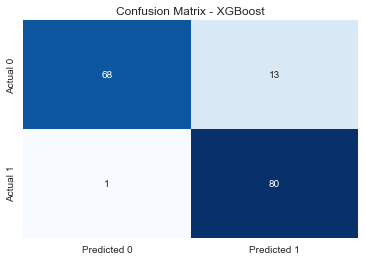

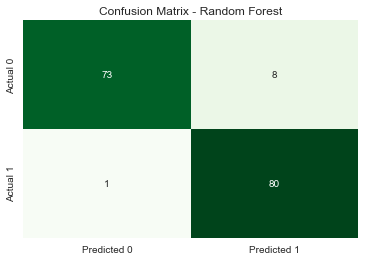

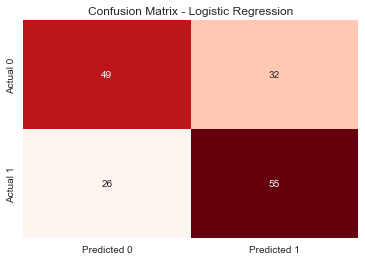

In [108]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Provided confusion matrices
conf_matrix_xgb = [[68, 13], [1, 80]]
conf_matrix_rf = [[73, 8], [1, 80]]
conf_matrix_lr = [[49, 32], [26, 55]]

# Plot confusion matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


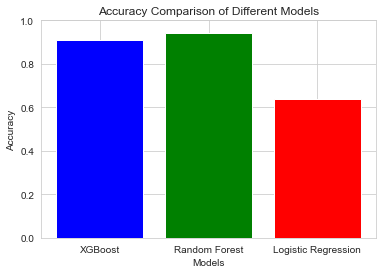

In [111]:
import matplotlib.pyplot as plt

# Accuracy values for XGBoost, Random Forest, and Logistic Regression
accuracy_values = [0.91, 0.94, 0.64]

# Model names
models = ['XGBoost', 'Random Forest', 'Logistic Regression']

# Plotting the bar graph
plt.bar(models, accuracy_values, color=['blue', 'green', 'red'])
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy values
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()
